***Exploración y limpieza de datos***

In [1]:
import pandas as pd
import numpy as np

url = '/workspaces/JLL_machine-learning-python-template/data/raw/url.csv'

data = pd.read_csv(url, sep=",") 
data.drop(["host_name","name", "id", "last_review","reviews_per_month"], axis = 1, inplace = True)
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


***Análisis de las variables***

*Categóricas*

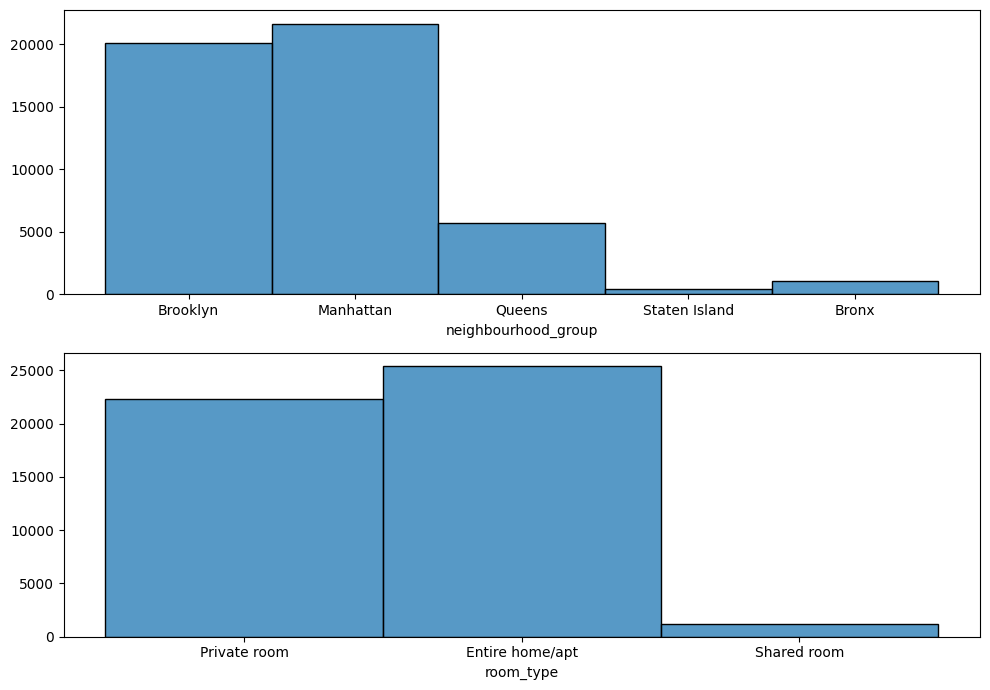

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = "room_type").set(ylabel = None)

plt.tight_layout()
plt.show()

Podemos observar en la varibale de barrios, que la gran mayoría se concentran entre Manhattan y Brooklyn sin dejar de perder los datos de Queens que también son significativos. Por otro lado, entendemos que tanto el Bronx como Staten Island no son tan atractivos quizá por la distancia al centro nuerágico de la ciudad o por la seguridad de los propios barrios.
Por otro lado, en el tipo de alojamiento, vemos como los datos se reparten entre las habitaciones privadas y los apartamentos o estudios enteros. Las habitaciones compartidas queda en un segundo plano con unos datos que no llegan a ser significantes.

*Numéricas*

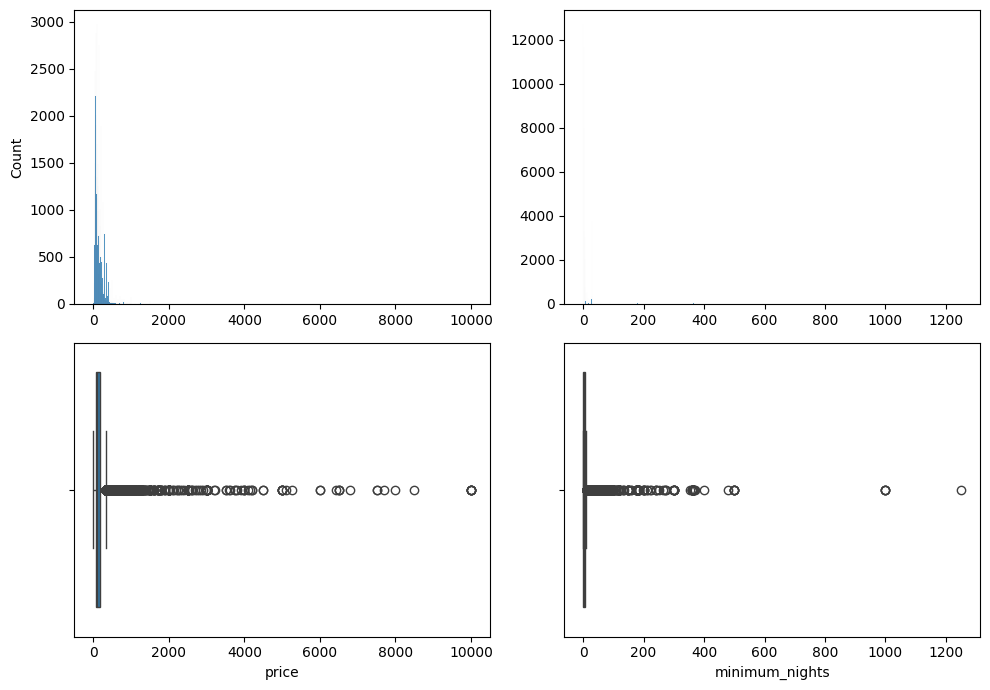

In [3]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

plt.tight_layout()
plt.show()


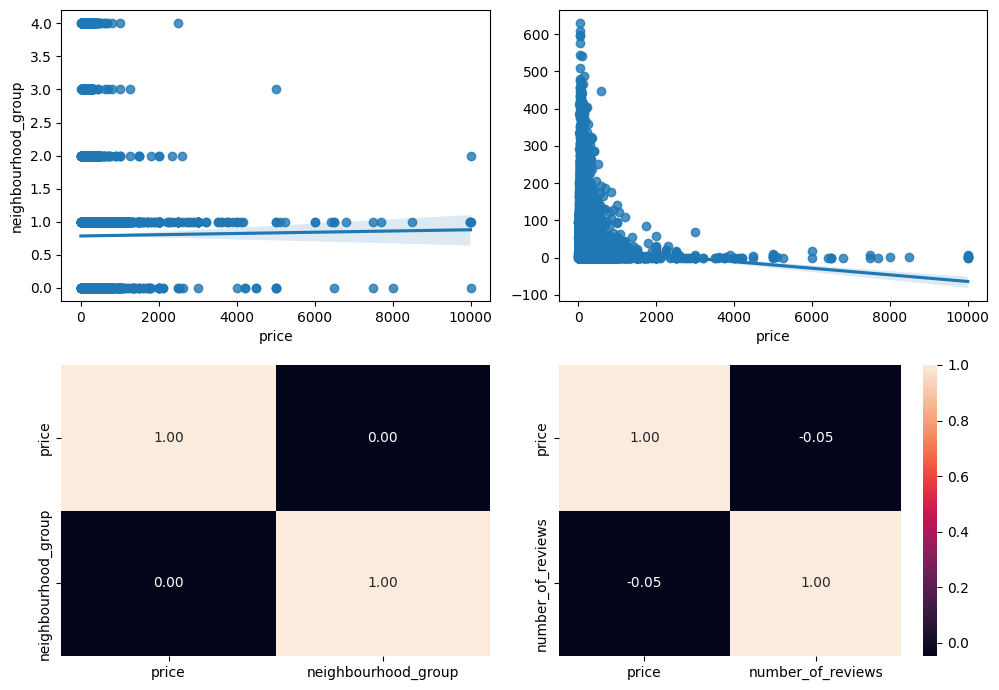

In [12]:
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "price", y = "neighbourhood_group")
sns.heatmap(data[["price", "neighbourhood_group"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "price", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()
